In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objects import Figure, Bar, Scatter, Histogram, Scatter3d

In [2]:
df = pd.read_csv('data/1_raw/superstore_dataset2011-2015.csv')
df.head(10).T

0                         1  \
Row ID                        42433                     22253   
Order ID               AG-2011-2040             IN-2011-47883   
Order Date                 1/1/2011                  1/1/2011   
Ship Date                  6/1/2011                  8/1/2011   
Ship Mode            Standard Class            Standard Class   
Customer ID                TB-11280                  JH-15985   
Customer Name       Toby Braunhardt               Joseph Holt   
Segment                    Consumer                  Consumer   
City                    Constantine               Wagga Wagga   
State                   Constantine           New South Wales   
Country                     Algeria                 Australia   
Postal Code                     NaN                       NaN   
Market                       Africa                      APAC   
Region                       Africa                   Oceania   
Product ID         OFF-TEN-10000025           OFF-SU-10000618   
Category            Office Supplies           Office Supplies   
Sub-Category                Storage                  Supplies   
Product Name    Tenex Lockers, Blue  Acme Trimmer, High Speed   
Sales                         408.3                   120.366   
Quantity                          2                         3   
Discount                        0.0                       0.1   
Profit                       106.14                    36.036   
Shipping Cost                 35.46                      9.72   
Order Priority               Medium                    Medium   

                                      2                            3  \
Row ID                            48883                        11731   
Order ID                   HU-2011-1220              IT-2011-3647632   
Order Date                     1/1/2011                     1/1/2011   
Ship Date                      5/1/2011                     5/1/2011   
Ship Mode                  Second Class                 Second Class   
Customer ID                      AT-735                     EM-14140   
Customer Name             Annie Thurman                 Eugene Moren   
Segment                        Consumer                  Home Office   
City                           Budapest                    Stockholm   
State                          Budapest                    Stockholm   
Country                         Hungary                       Sweden   
Postal Code                         NaN                          NaN   
Market                             EMEA                           EU   
Region                             EMEA                        North   
Product ID             OFF-TEN-10001585              OFF-PA-10001492   
Category                Office Supplies              Office Supplies   
Sub-Category                    Storage                        Paper   
Product Name    Tenex Box, Single Width  Enermax Note Cards, Premium   
Sales                             66.12                       44.865   
Quantity                              4                            3   
Discount                            0.0                          0.5   
Profit                            29.64                      -26.055   
Shipping Cost                      8.17                         4.82   
Order Priority                     High                         High   

                                         4  \
Row ID                               22255   
Order ID                     IN-2011-47883   
Order Date                        1/1/2011   
Ship Date                         8/1/2011   
Ship Mode                   Standard Class   
Customer ID                       JH-15985   
Customer Name                  Joseph Holt   
Segment                           Consumer   
City                           Wagga Wagga   
State                      New South Wales   
Country                          Australia   
Postal Code                            NaN   
Market   

In [3]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [4]:
df.shape

(51290, 24)

In [5]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
df.columns = df.columns.str.lower().str.replace(r' ', '_')
df.head(1)

row_id      order_id order_date ship_date       ship_mode customer_id  \
0   42433  AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   

     customer_name   segment         city        state  ...        product_id  \
0  Toby Braunhardt  Consumer  Constantine  Constantine  ...  OFF-TEN-10000025   

          category sub-category         product_name  sales quantity discount  \
0  Office Supplies      Storage  Tenex Lockers, Blue  408.3        2      0.0   

   profit  shipping_cost  order_priority  
0  106.14          35.46          Medium  

[1 rows x 24 columns]

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [8]:
df.to_parquet('data/2_preprocessed/preprocessed_sales.parquet')

In [9]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

# Profit analysis

In [10]:
print(f"mean: {df['profit'].mean()}")
print(f"max: {df['profit'].max()}")
print(f"min: {df['profit'].min()}")

mean: 28.610982477675964
max: 8399.976
min: -6599.978


In [11]:
df['profit'].sum()

1467457.2912800002

<AxesSubplot:>

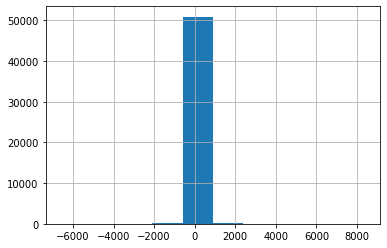

In [12]:
df['profit'].hist()

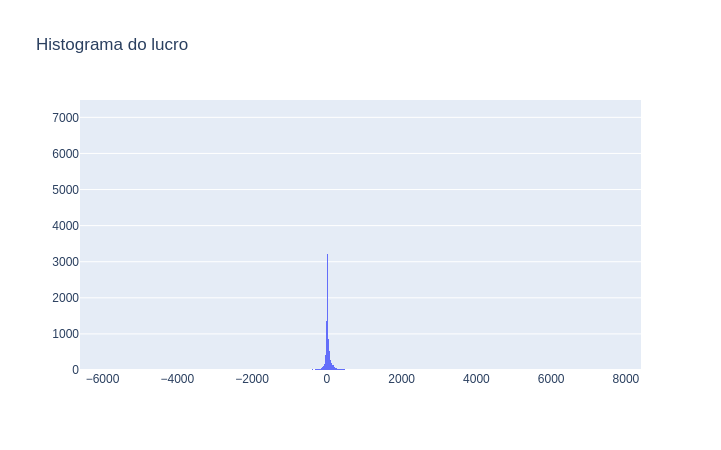

In [53]:
fig = Figure([Histogram(x=df['profit'])])
fig.update_layout(title='Histograma do lucro')
fig.show()

# Classes analysis

In [14]:
df.head().T

0                         1  \
row_id                        42433                     22253   
order_id               AG-2011-2040             IN-2011-47883   
order_date      2011-01-01 00:00:00       2011-01-01 00:00:00   
ship_date       2011-06-01 00:00:00       2011-08-01 00:00:00   
ship_mode            Standard Class            Standard Class   
customer_id                TB-11280                  JH-15985   
customer_name       Toby Braunhardt               Joseph Holt   
segment                    Consumer                  Consumer   
city                    Constantine               Wagga Wagga   
state                   Constantine           New South Wales   
country                     Algeria                 Australia   
postal_code                     NaN                       NaN   
market                       Africa                      APAC   
region                       Africa                   Oceania   
product_id         OFF-TEN-10000025           OFF-SU-10000618   
category            Office Supplies           Office Supplies   
sub-category                Storage                  Supplies   
product_name    Tenex Lockers, Blue  Acme Trimmer, High Speed   
sales                         408.3                   120.366   
quantity                          2                         3   
discount                        0.0                       0.1   
profit                       106.14                    36.036   
shipping_cost                 35.46                      9.72   
order_priority               Medium                    Medium   

                                      2                            3  \
row_id                            48883                        11731   
order_id                   HU-2011-1220              IT-2011-3647632   
order_date          2011-01-01 00:00:00          2011-01-01 00:00:00   
ship_date           2011-05-01 00:00:00          2011-05-01 00:00:00   
ship_mode                  Second Class                 Second Class   
customer_id                      AT-735                     EM-14140   
customer_name             Annie Thurman                 Eugene Moren   
segment                        Consumer                  Home Office   
city                           Budapest                    Stockholm   
state                          Budapest                    Stockholm   
country                         Hungary                       Sweden   
postal_code                         NaN                          NaN   
market                             EMEA                           EU   
region                             EMEA                        North   
product_id             OFF-TEN-10001585              OFF-PA-10001492   
category                Office Supplies              Office Supplies   
sub-category                    Storage                        Paper   
product_name    Tenex Box, Single Width  Enermax Note Cards, Premium   
sales                             66.12                       44.865   
quantity                              4                            3   
discount                            0.0                          0.5   
profit                            29.64                      -26.055   
shipping_cost                      8.17                         4.82   
order_priority                     High                         High   

                                         4  
row_id                               22255  
order_id                     IN-2011-47883  
order_date             2011-01-01 00:00:00  
ship_date              2011-08-01 00:00:00  
ship_mode                   Standard Class  
customer_id                       JH-15985  
customer_name                  Joseph Holt  
segment                           Consumer  
city                           Wagga Wagga  
state                      New South Wales  
country                          Australia  
postal_code                            NaN  
market                

### ship_mode

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

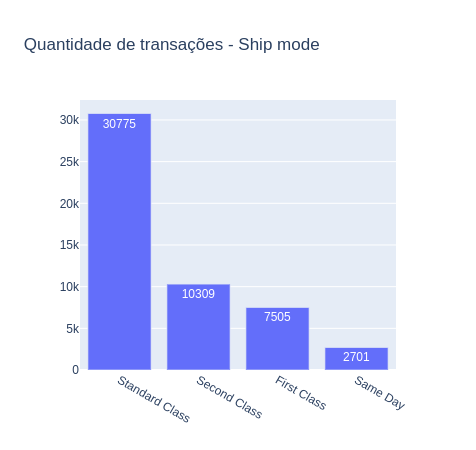

In [58]:
data = df['ship_mode'].value_counts()

fig = Figure([
    Bar(x=data.index, y=data, text=data, textposition='auto')
])

fig.update_layout(title='Quantidade de transações - Ship mode')

fig.show()

<AxesSubplot:xlabel='ship_mode', ylabel='profit'>

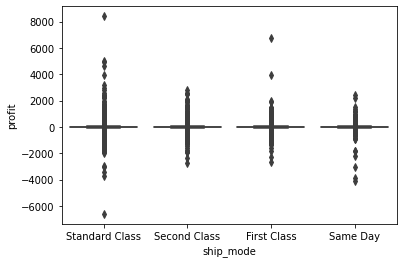

In [17]:
sns.boxplot(x='ship_mode', y='profit', data=df)

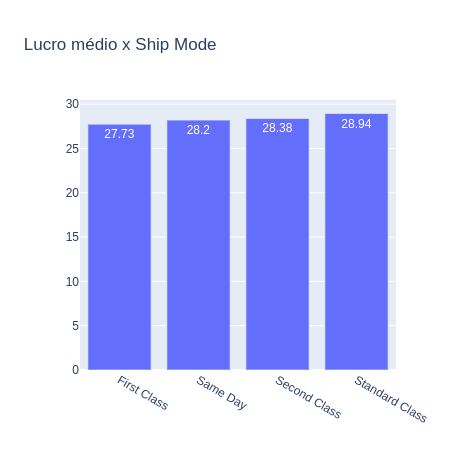

In [59]:
grouped = df.groupby('ship_mode')['profit'].mean().round(2)
fig = Figure([Bar(x=grouped.index, y=grouped, text=grouped, textposition='auto')])
fig.update_layout(title='Lucro médio x Ship Mode')
fig.show()

### segment

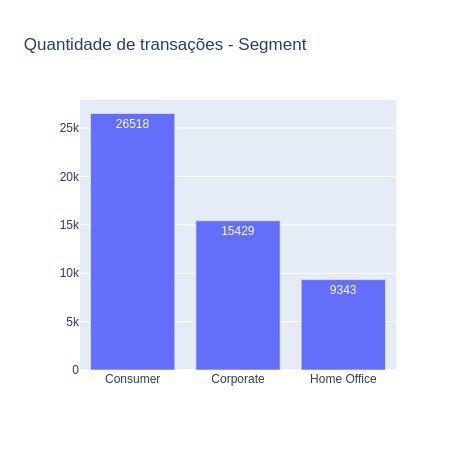

In [61]:
data = df['segment'].value_counts()

fig = Figure([
    Bar(x=data.index, y=data, text=data, textposition='auto')
])

fig.update_layout(title='Quantidade de transações - Segment')

fig.show()

<AxesSubplot:xlabel='segment', ylabel='profit'>

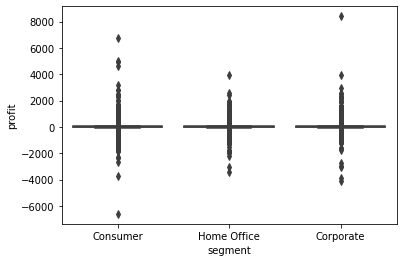

In [20]:
sns.boxplot(x='segment', y='profit', data=df)

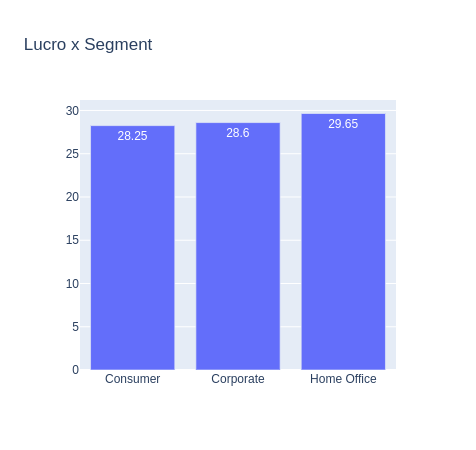

In [62]:
grouped = df.groupby('segment')['profit'].mean().round(2)
fig = Figure([Bar(x=grouped.index, y=grouped, text=grouped, textposition='auto')])
fig.update_layout(title='Lucro x Segment')
fig.show()

### country

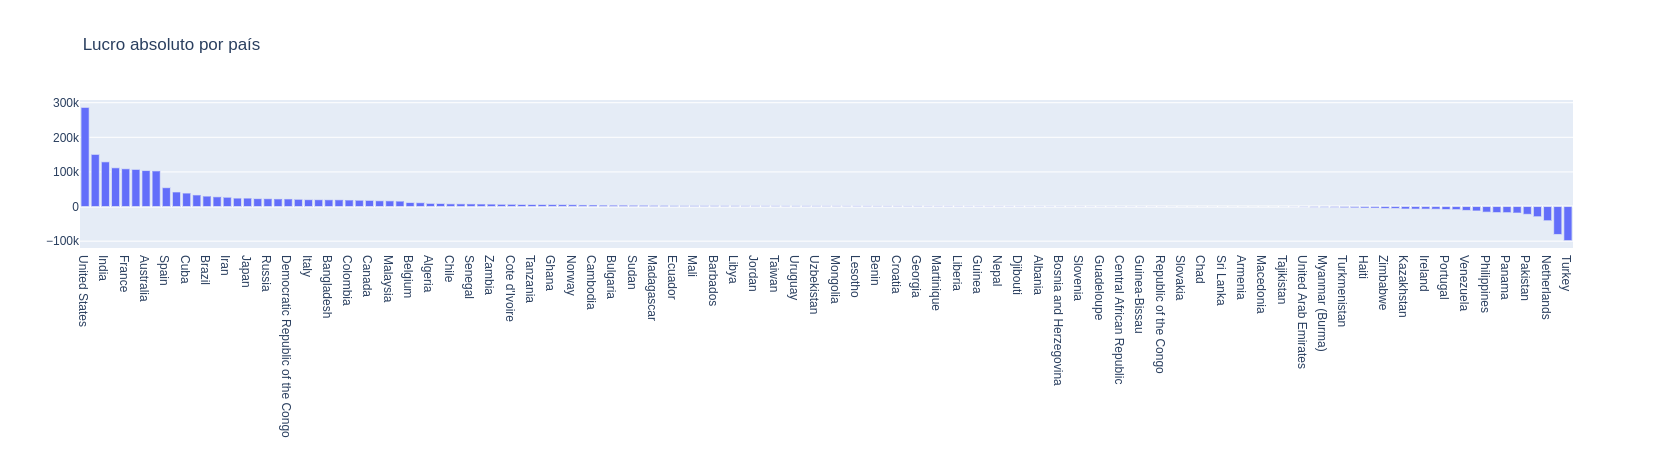

In [64]:
grouped = df.groupby('country')['profit'].sum().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.update_layout(title='Lucro absoluto por país')
fig.show()

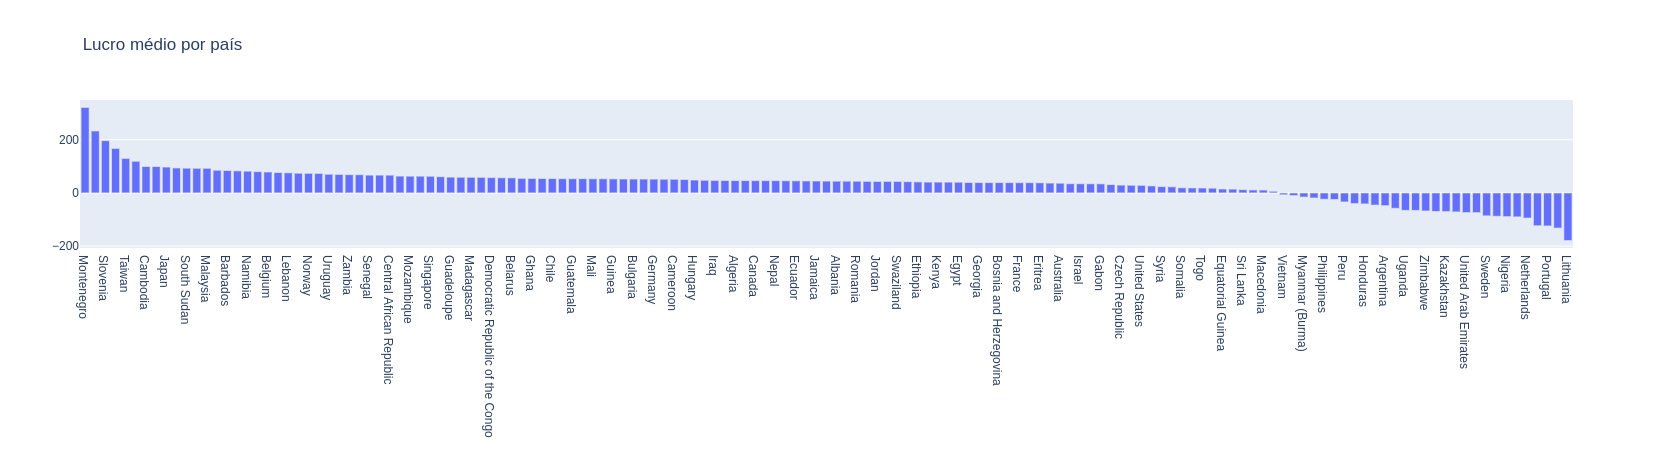

In [63]:
grouped = df.groupby('country')['profit'].mean().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.update_layout(title='Lucro médio por país')
fig.show()

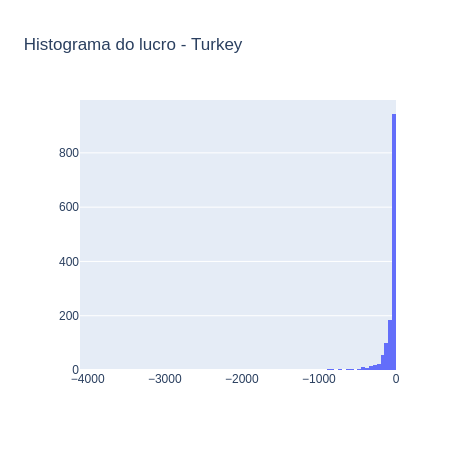

In [66]:
data = df.query('country == "Turkey"')['profit']
fig = Figure([Histogram(x=data)])
fig.update_layout(title='Histograma do lucro - Turkey')
fig.show()

In [74]:
data.round(2).value_counts()

 0.00       65
 6.22       50
 9.33       39
 3.63       35
 5.44       33
            ..
 2365.98     1
 20.04       1
-28.50       1
 14.24       1
 55.06       1
Name: profit, Length: 5155, dtype: int64

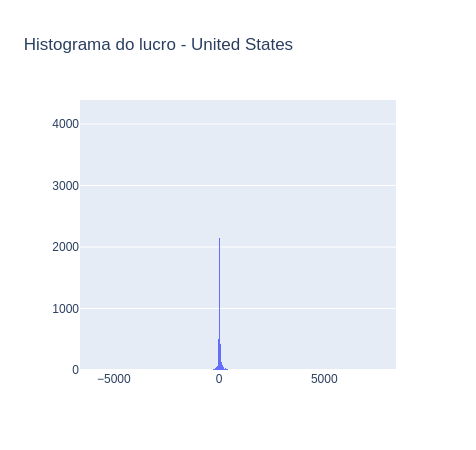

In [67]:
data = df.query('country == "United States"')['profit']
fig = Figure([Histogram(x=data)])
fig.update_layout(title='Histograma do lucro - United States')
fig.show()

### market

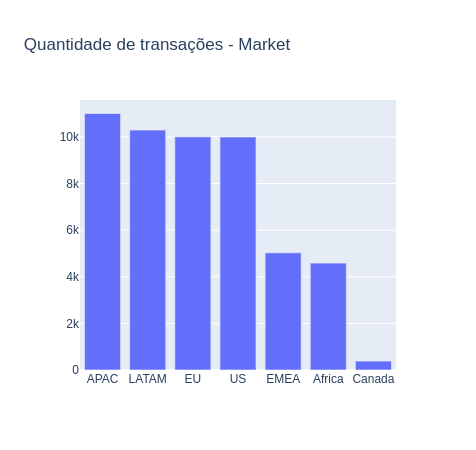

In [75]:
data = df['market'].value_counts()

fig = Figure([
    Bar(x=data.index, y=data)
])

fig.update_layout(title='Quantidade de transações - Market')

fig.show()

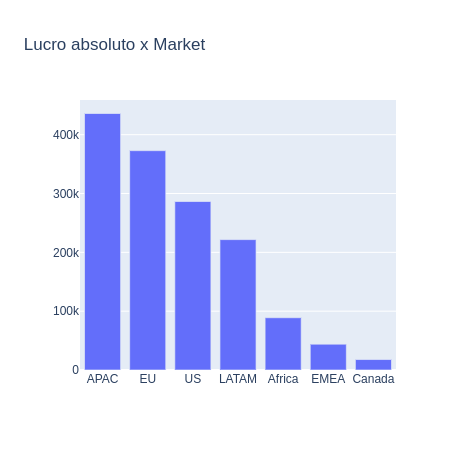

In [76]:
grouped = df.groupby('market')['profit'].sum().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.update_layout(title='Lucro absoluto x Market')
fig.show()

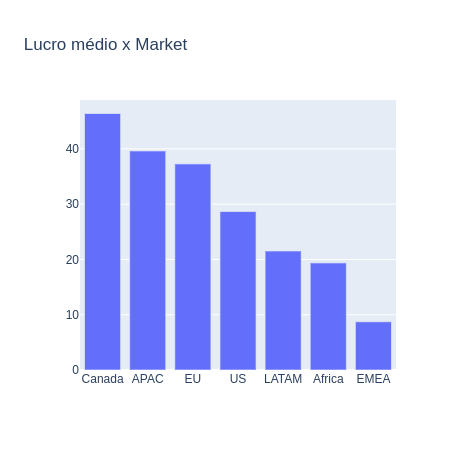

In [77]:
grouped = df.groupby('market')['profit'].mean().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.update_layout(title='Lucro médio x Market')
fig.show()

<AxesSubplot:xlabel='market', ylabel='profit'>

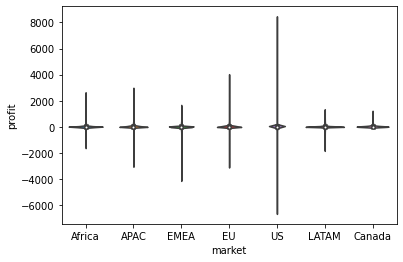

In [29]:
sns.violinplot(x='market', y='profit', data=df)

### region

<AxesSubplot:>

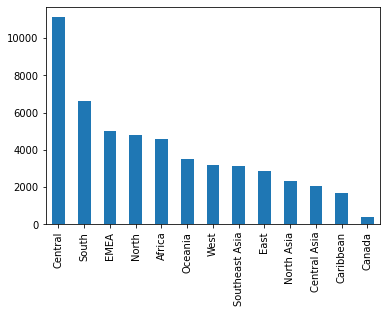

In [30]:
df['region'].value_counts().plot.bar()

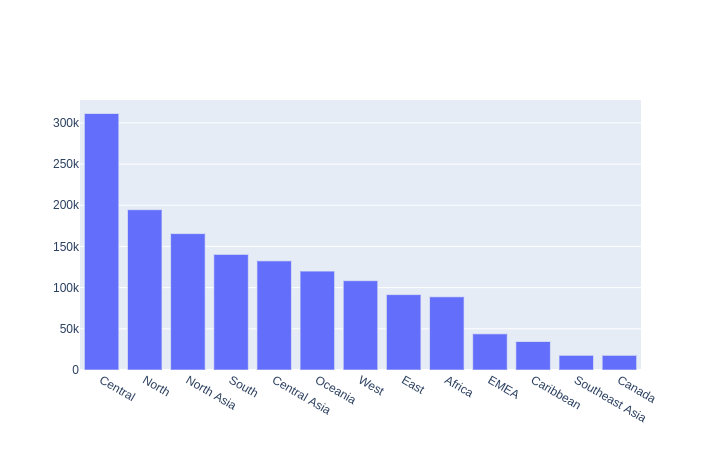

In [31]:
grouped = df.groupby('region')['profit'].sum().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.show()

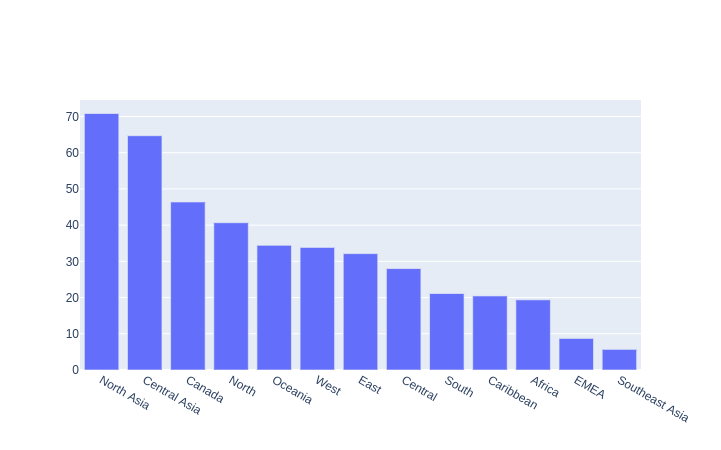

In [32]:
grouped = df.groupby('region')['profit'].mean().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped)])
fig.show()

In [33]:
df.head().T

0                         1  \
row_id                        42433                     22253   
order_id               AG-2011-2040             IN-2011-47883   
order_date      2011-01-01 00:00:00       2011-01-01 00:00:00   
ship_date       2011-06-01 00:00:00       2011-08-01 00:00:00   
ship_mode            Standard Class            Standard Class   
customer_id                TB-11280                  JH-15985   
customer_name       Toby Braunhardt               Joseph Holt   
segment                    Consumer                  Consumer   
city                    Constantine               Wagga Wagga   
state                   Constantine           New South Wales   
country                     Algeria                 Australia   
postal_code                     NaN                       NaN   
market                       Africa                      APAC   
region                       Africa                   Oceania   
product_id         OFF-TEN-10000025           OFF-SU-10000618   
category            Office Supplies           Office Supplies   
sub-category                Storage                  Supplies   
product_name    Tenex Lockers, Blue  Acme Trimmer, High Speed   
sales                         408.3                   120.366   
quantity                          2                         3   
discount                        0.0                       0.1   
profit                       106.14                    36.036   
shipping_cost                 35.46                      9.72   
order_priority               Medium                    Medium   

                                      2                            3  \
row_id                            48883                        11731   
order_id                   HU-2011-1220              IT-2011-3647632   
order_date          2011-01-01 00:00:00          2011-01-01 00:00:00   
ship_date           2011-05-01 00:00:00          2011-05-01 00:00:00   
ship_mode                  Second Class                 Second Class   
customer_id                      AT-735                     EM-14140   
customer_name             Annie Thurman                 Eugene Moren   
segment                        Consumer                  Home Office   
city                           Budapest                    Stockholm   
state                          Budapest                    Stockholm   
country                         Hungary                       Sweden   
postal_code                         NaN                          NaN   
market                             EMEA                           EU   
region                             EMEA                        North   
product_id             OFF-TEN-10001585              OFF-PA-10001492   
category                Office Supplies              Office Supplies   
sub-category                    Storage                        Paper   
product_name    Tenex Box, Single Width  Enermax Note Cards, Premium   
sales                             66.12                       44.865   
quantity                              4                            3   
discount                            0.0                          0.5   
profit                            29.64                      -26.055   
shipping_cost                      8.17                         4.82   
order_priority                     High                         High   

                                         4  
row_id                               22255  
order_id                     IN-2011-47883  
order_date             2011-01-01 00:00:00  
ship_date              2011-08-01 00:00:00  
ship_mode                   Standard Class  
customer_id                       JH-15985  
customer_name                  Joseph Holt  
segment                           Consumer  
city                           Wagga Wagga  
state                      New South Wales  
country                          Australia  
postal_code                            NaN  
market                

### category

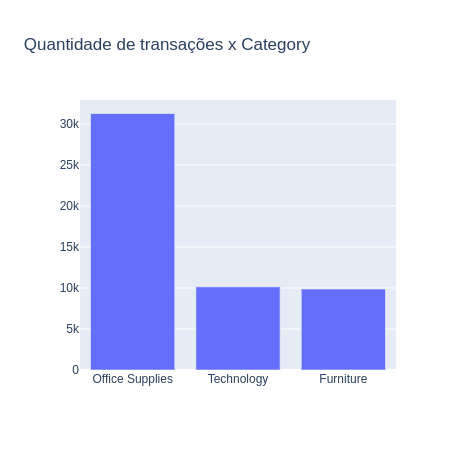

In [78]:
data = df['category'].value_counts()

fig = Figure([
    Bar(x=data.index, y=data)
])

fig.update_layout(title='Quantidade de transações x Category')

fig.show()

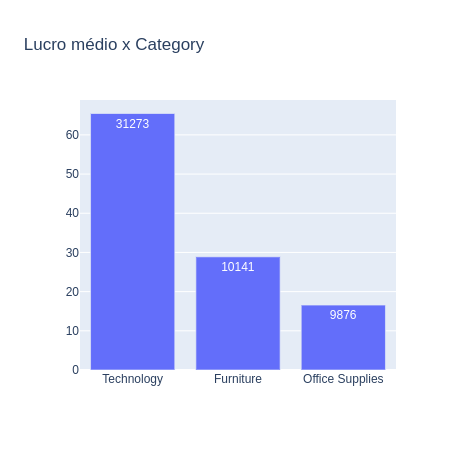

In [80]:
grouped = df.groupby('category')['profit'].mean().sort_values(ascending=False)

fig = Figure([Bar(x=grouped.index, y=grouped, text=data, textposition='auto')])
fig.update_layout(title='Lucro médio x Category')
fig.show()

### sub-category

<AxesSubplot:>

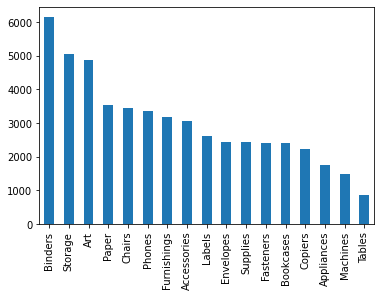

In [36]:
df['sub-category'].value_counts().plot.bar()

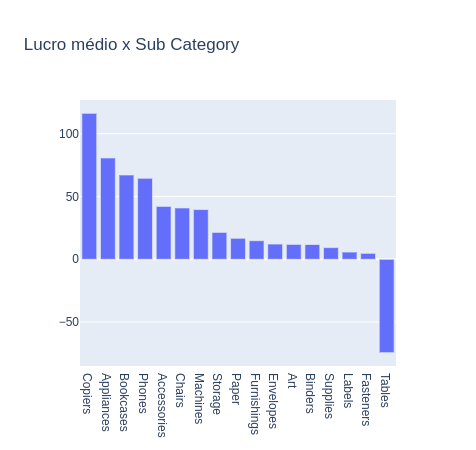

In [81]:
data = df.groupby('sub-category')['profit'].mean().sort_values(ascending=False)

fig = Figure([
    Bar(x=data.index, y=data)
])

fig.update_layout(title='Lucro médio x Sub Category')

fig.show()

<AxesSubplot:xlabel='sub-category'>

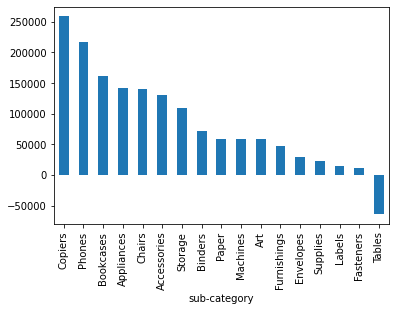

In [38]:
df.groupby('sub-category')['profit'].sum().sort_values(ascending=False).plot.bar()

### order-priority

<AxesSubplot:>

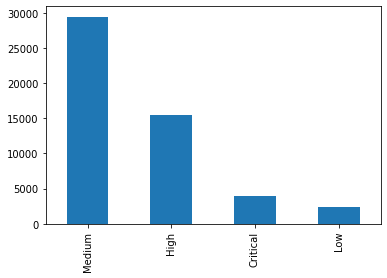

In [39]:
df['order_priority'].value_counts().plot.bar()

<AxesSubplot:xlabel='order_priority'>

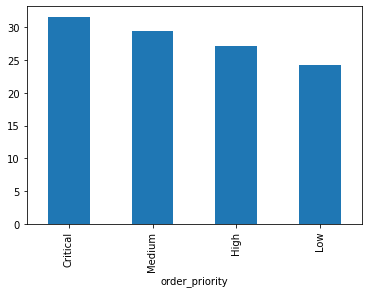

In [40]:
df.groupby('order_priority')['profit'].mean().sort_values(ascending=False).plot.bar()

# Correlation analysis

<AxesSubplot:>

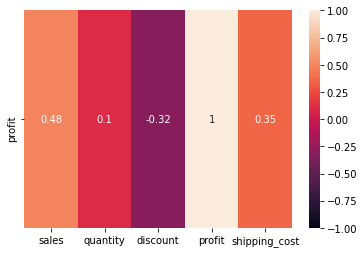

In [41]:
correlation = df.drop(columns=['row_id', 'postal_code']).corr()

sns.heatmap(data=correlation.loc[['profit'], :], vmin=-1, vmax=1, annot=True)

In [42]:
correlation.loc[['profit'], :]

sales  quantity  discount  profit  shipping_cost
profit  0.484918  0.104365  -0.31649     1.0       0.354441

In [43]:
numerical_columns = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']
# g = sns.FacetGrid(df)

In [44]:
ddf = df[numerical_columns]
ddf.head()

sales  quantity  discount   profit  shipping_cost
0  408.300         2       0.0  106.140          35.46
1  120.366         3       0.1   36.036           9.72
2   66.120         4       0.0   29.640           8.17
3   44.865         3       0.5  -26.055           4.82
4  113.670         5       0.1   37.770           4.70

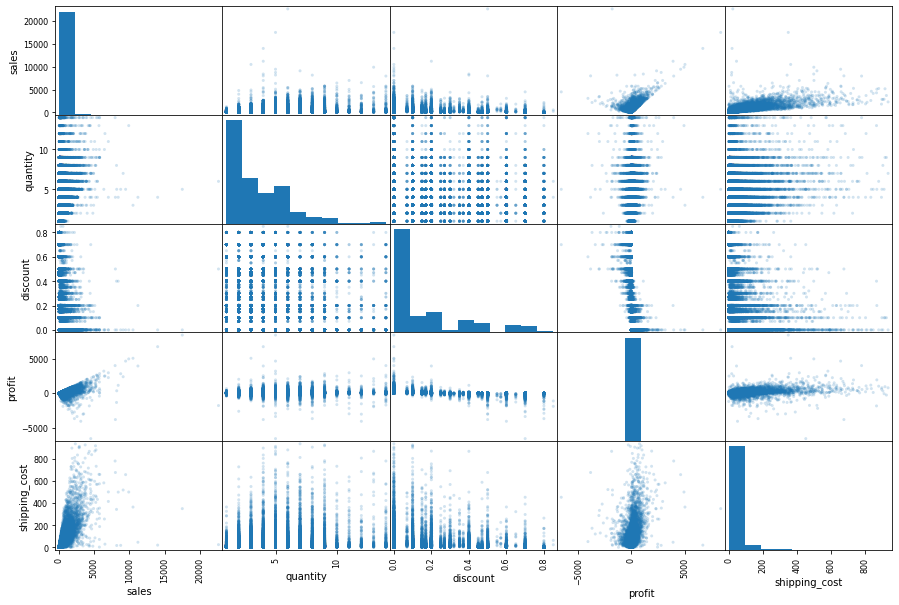

In [45]:
pd.plotting.scatter_matrix(ddf, alpha=0.2, figsize=(15, 10));

<AxesSubplot:>

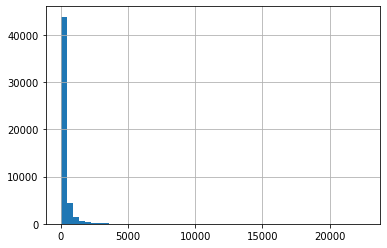

In [46]:
df.sales.hist(bins=50)

In [47]:
df.head().T

0                         1  \
row_id                        42433                     22253   
order_id               AG-2011-2040             IN-2011-47883   
order_date      2011-01-01 00:00:00       2011-01-01 00:00:00   
ship_date       2011-06-01 00:00:00       2011-08-01 00:00:00   
ship_mode            Standard Class            Standard Class   
customer_id                TB-11280                  JH-15985   
customer_name       Toby Braunhardt               Joseph Holt   
segment                    Consumer                  Consumer   
city                    Constantine               Wagga Wagga   
state                   Constantine           New South Wales   
country                     Algeria                 Australia   
postal_code                     NaN                       NaN   
market                       Africa                      APAC   
region                       Africa                   Oceania   
product_id         OFF-TEN-10000025           OFF-SU-10000618   
category            Office Supplies           Office Supplies   
sub-category                Storage                  Supplies   
product_name    Tenex Lockers, Blue  Acme Trimmer, High Speed   
sales                         408.3                   120.366   
quantity                          2                         3   
discount                        0.0                       0.1   
profit                       106.14                    36.036   
shipping_cost                 35.46                      9.72   
order_priority               Medium                    Medium   

                                      2                            3  \
row_id                            48883                        11731   
order_id                   HU-2011-1220              IT-2011-3647632   
order_date          2011-01-01 00:00:00          2011-01-01 00:00:00   
ship_date           2011-05-01 00:00:00          2011-05-01 00:00:00   
ship_mode                  Second Class                 Second Class   
customer_id                      AT-735                     EM-14140   
customer_name             Annie Thurman                 Eugene Moren   
segment                        Consumer                  Home Office   
city                           Budapest                    Stockholm   
state                          Budapest                    Stockholm   
country                         Hungary                       Sweden   
postal_code                         NaN                          NaN   
market                             EMEA                           EU   
region                             EMEA                        North   
product_id             OFF-TEN-10001585              OFF-PA-10001492   
category                Office Supplies              Office Supplies   
sub-category                    Storage                        Paper   
product_name    Tenex Box, Single Width  Enermax Note Cards, Premium   
sales                             66.12                       44.865   
quantity                              4                            3   
discount                            0.0                          0.5   
profit                            29.64                      -26.055   
shipping_cost                      8.17                         4.82   
order_priority                     High                         High   

                                         4  
row_id                               22255  
order_id                     IN-2011-47883  
order_date             2011-01-01 00:00:00  
ship_date              2011-08-01 00:00:00  
ship_mode                   Standard Class  
customer_id                       JH-15985  
customer_name                  Joseph Holt  
segment                           Consumer  
city                           Wagga Wagga  
state                      New South Wales  
country                          Australia  
postal_code                            NaN  
market                

# Time series exploration

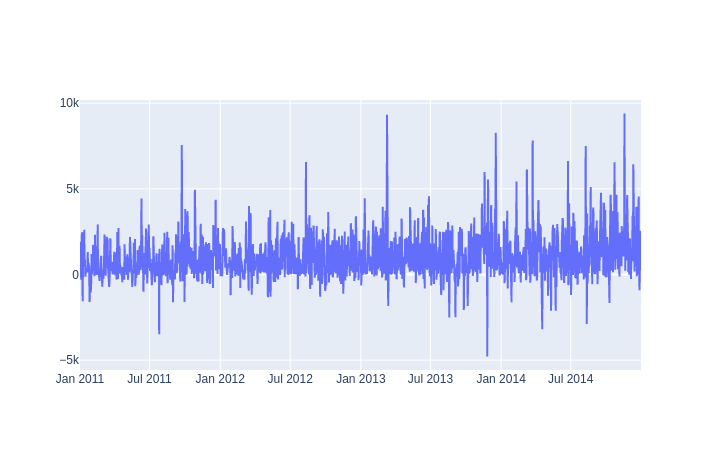

In [48]:
ts = df.groupby('order_date')['profit'].sum()
fig = Figure([Scatter(x=ts.index, y=ts)])
fig.show()

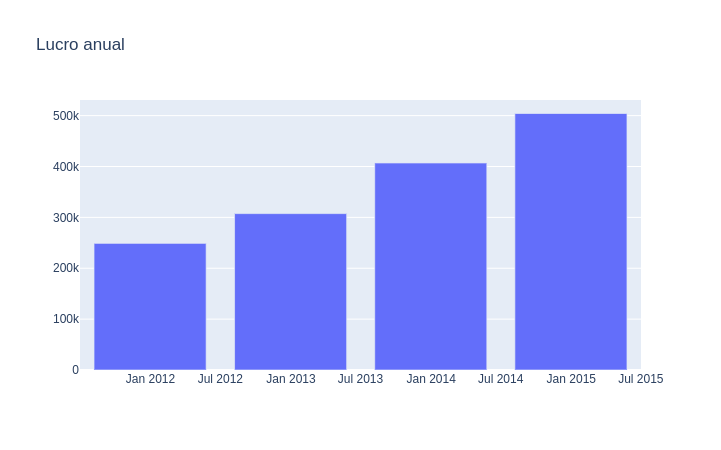

In [49]:
d = ts.resample('Y').sum()

fig = Figure([
    Bar(x=d.index, y=d)
])

fig.update_layout(
    title='Lucro anual'
)

fig.show()

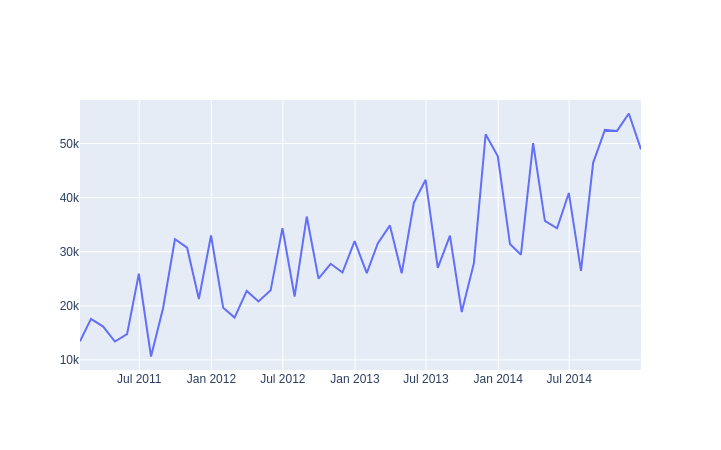

In [50]:
monthly_ts = ts.resample('M').sum()

fig = Figure([Scatter(x=monthly_ts.index, y=monthly_ts)])
fig.show()

# shipping_cost vs discount

<AxesSubplot:>

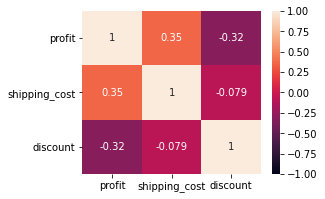

In [91]:
correlation = df[['profit', 'shipping_cost', 'discount']].corr()

fig = plt.figure(figsize=(4, 3))
sns.heatmap(data=correlation, vmin=-1, vmax=1, annot=True)

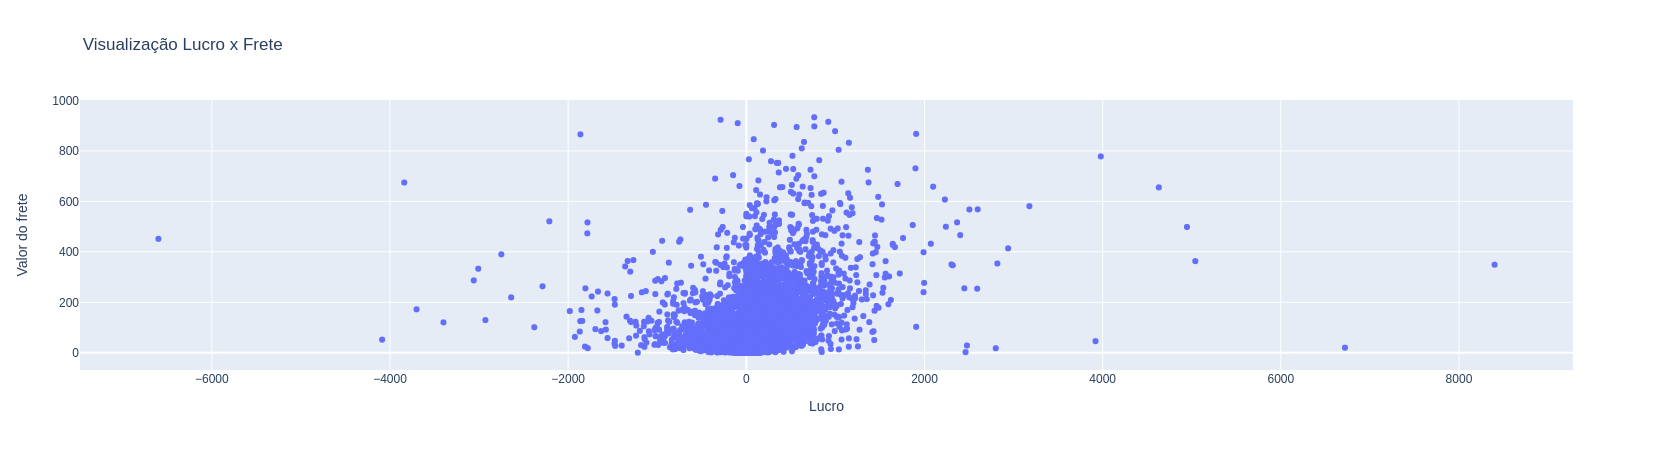

In [83]:
fig = Figure([
    Scatter(x=df['profit'], y=df['shipping_cost'], mode='markers')
])

fig.update_layout(
    title='Visualização Lucro x Frete',
    xaxis={'title': 'Lucro'},
    yaxis={'title': 'Valor do frete'}
)
fig.show()

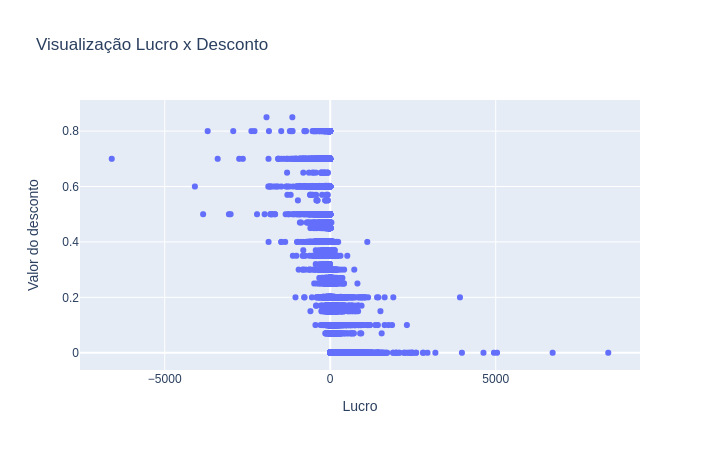

In [92]:
fig = Figure([
    Scatter(x=df['profit'], y=df['discount'], mode='markers')
])

fig.update_layout(
    title='Visualização Lucro x Desconto',
    xaxis={'title': 'Lucro'},
    yaxis={'title': 'Valor do desconto'}
)

fig.show()

In [93]:
df_discount = df.assign(discount_band=pd.qcut(df['discount'], 10, duplicates='drop'))[['discount', 'discount_band', 'profit', 'sales', 'quantity']]
df_discount.groupby('discount_band').agg({
    'profit':['mean', 'median'],
    'quantity':['mean', 'median'],
    'sales':['mean', 'median'],
})

profit            quantity              sales           
                    mean    median      mean median        mean     median
discount_band                                                             
(-0.001, 0.1]  62.600467  18.18540  3.454494      3  265.822542   96.66000
(0.1, 0.2]     27.614734   6.54625  3.728722      3  280.086282   95.06875
(0.2, 0.35]   -33.796060 -10.29150  3.796595      3  441.536412  247.07475
(0.35, 0.5]   -60.328481 -16.27832  3.714735      3  176.462166   63.36825
(0.5, 0.85]   -98.893015 -25.22275  2.844919      2   89.075902   23.59200

In [94]:
df_shipping_cost = df.assign(shipping_cost_band=pd.qcut(df['shipping_cost'], 10, duplicates='drop'))[['shipping_cost', 'shipping_cost_band', 'profit', 'quantity', 'sales']]
df_shipping_cost.groupby('shipping_cost_band').agg({
    'profit':['mean', 'median'],
    'quantity':['mean', 'median'],
    'sales':['mean', 'median'],
})

profit            quantity               sales  \
                          mean    median      mean median         mean   
shipping_cost_band                                                       
(-0.001, 1.039]      -0.451903    1.1765  2.123026      2    16.066261   
(1.039, 2.02]         1.166838    3.5200  2.566473      2    27.943361   
(2.02, 3.32]          2.828668    5.1600  2.872311      2    42.058991   
(3.32, 5.16]          3.956665    7.5930  3.161920      3    57.268341   
(5.16, 7.79]          6.874355   10.8615  3.400625      3    84.091957   
(7.79, 11.96]         9.640595   14.4900  3.539076      3   119.414576   
(11.96, 19.02]       16.594827   22.3888  3.782549      3   185.032566   
(19.02, 31.86]       25.172673   31.5705  3.982449      3   283.907978   
(31.86, 65.13]       51.362402   56.3240  4.264574      4   472.119234   
(65.13, 933.57]     169.031139  131.9900  5.076638      5  1177.559755   

                               
                       median  
shipping_cost_band             
(-0.001, 1.039]       9.96000  
(1.039, 2.02]        19.98500  
(2.02, 3.32]         31.63800  
(3.32, 5.16]         47.94000  
(5.16, 7.79]         69.55320  
(7.79, 11.96]       101.04000  
(11.96, 19.02]      153.82952  
(19.02, 31.86]      239.93600  
(31.86, 65.13]      401.64600  
(65.13, 933.57]     914.28000